In [1]:
using PyCall

INFO: Recompiling stale cache file C:\Users\User\.julia\lib\v0.6\PyCall.ji for module PyCall.


In [14]:
@pyimport sklearn.cluster as cluster
@pyimport sklearn.datasets as datasets
@pyimport numpy as np
@pyimport numpy.random as rn

In [27]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = rn.rand(n_samples, 2)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

([-3.37562 3.63236; -3.61883 3.78628; … ; -0.497381 0.782278; 1.1309 -1.13033], Int32[1, 1, 0, 1, 1, 2, 0, 0, 0, 2  …  1, 1, 2, 0, 2, 0, 1, 2, 2, 2])

In [184]:
include("ClusteringFunctions.jl")
using NearestNeighbors, DataStructures

In [122]:
@time s=data2clust(noisy_circles[1],2,0.75,3,0.5)

  0.254104 seconds (2.09 M allocations: 85.633 MiB, 11.08% gc time)


3-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (860, [860, 690, 23, 473, 1317, 642, 1007, 86, 257, 674  …  1166, 455, 118, 996, 1286, 1412, 947, 912, 11, 521])  
 (293, [293, 1450, 231, 383, 308, 749, 1260, 566, 612, 1051  …  472, 636, 151, 402, 197, 381, 1298, 78, 994, 1210])
 (1002, [1002, 1026, 808, 490, 1362, 208, 644, 1159, 374, 580  …  54, 813, 187, 375, 815, 617, 657, 683, 709, 263])

In [123]:
using Plots

In [124]:
pints,plt=PlotClustering(noisy_circles[1],s,4)

(1500, Plot{Plots.GRBackend() n=3})

In [125]:
#plt

In [139]:
@time s=data2clust(blobs[1],2,1,3,0.4)

  0.085568 seconds (521.12 k allocations: 22.226 MiB, 8.53% gc time)


4-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (814, [814, 1111, 1163, 794, 834, 828, 1290, 73, 1003, 312  …  454, 1235, 616, 353, 453, 1484, 199, 395, 1254, 717])      
 (682, [682, 783, 1097, 790, 601, 350, 152, 1499, 966, 560  …  702, 1073, 1343, 1256, 380, 1172, 274, 1126, 838, 1413])    
 (1325, [1325, 1337, 430, 1266, 1341, 415, 1270, 1079, 54, 1433  …  1093, 1430, 151, 49, 37, 1099, 289, 899, 1072, 1390])  
 (1101, [1101, 741, 213, 1068, 304, 1002, 1356, 1202, 253, 442  …  1429, 1214, 1259, 1269, 755, 706, 585, 1103, 1115, 441])

In [140]:
pints,plt2=PlotClustering(blobs[1],s,4)

(1498, Plot{Plots.GRBackend() n=4})

In [144]:
S=data2clust(no_structure,2,1,3,0.4)

1-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (22, [22, 1177, 1227, 340, 1220, 359, 1459, 278, 1229, 822  …  675, 604, 302, 801, 42, 213, 1171, 96, 1333, 824])

In [147]:
pints,plt3=PlotClustering(no_structure,S,4)

(1500, Plot{Plots.GRBackend() n=1})

In [149]:
#plot(plt3)

In [177]:
X_aniso

1500×2 Array{Float64,2}:
 -3.37562    3.63236  
 -3.61883    3.78628  
 -3.48553    0.464121 
 -2.42218    2.10178  
 -2.12724    2.14297  
  0.656798  -0.351245 
 -3.76973    1.68852  
 -5.241      3.57587  
 -2.28943   -0.0571977
  0.286449   1.03304  
  2.99777   -3.12754  
  0.746674  -0.846673 
 -3.11912    1.10498  
  ⋮                   
  0.206282   0.553309 
 -3.49876    1.23181  
 -2.76653    2.79954  
 -3.66749    4.2665   
  0.184681   0.692758 
 -4.04828    2.04356  
  1.42573   -1.43952  
 -2.42556   -0.265186 
 -2.81763    3.19794  
  1.17963   -1.54263  
 -0.497381   0.782278 
  1.1309    -1.13033  

In [194]:
@time S=data2clust(X_aniso,2,0.5,100,0.05)

  0.254961 seconds (568.82 k allocations: 28.921 MiB)


3-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (121, [121, 117, 1359, 776, 725, 613, 1099, 1019, 1007, 1308  …  230, 500, 1010, 844, 617, 1373, 91, 522, 11, 1414])
 (154, [154, 362, 849, 1274, 770, 1084, 1106, 943, 1345, 372  …  873, 627, 1448, 650, 1455, 646, 133, 404, 388, 8])  
 (1491, [1491, 1284, 1420, 66, 80, 1085, 1033, 1094, 1028, 483  …  413, 683, 92, 987, 988, 915, 676, 1040, 761, 743])

In [195]:
gr()

Plots.GRBackend()

In [196]:
points,plt4=PlotClustering(X_aniso,S)

(1496, Plot{Plots.GRBackend() n=3})

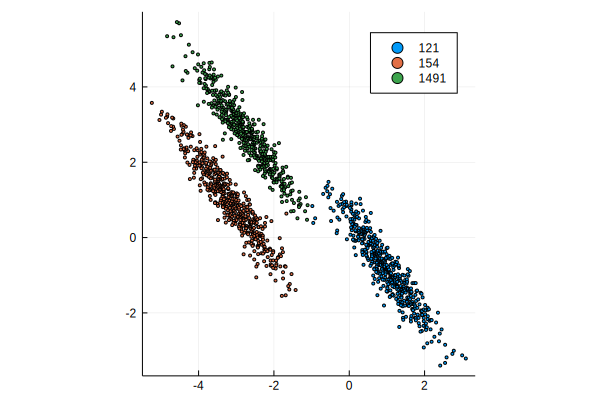

In [197]:
plot(plt4)